### Graph Networks for the three targets

In [23]:
import networkx as nx
import numpy as np
import pandas as pd
import csv
from operator import itemgetter
from networkx.algorithms import community
from networkx import connected_components
import matplotlib.pyplot as plt

import scipy.sparse as sp

In [47]:
neg_beh = pd.read_csv('data/SADCQ.csv')

In [48]:
neg_beh = neg_beh[neg_beh['year']==2019]

In [49]:
neg_beh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56770 entries, 447479 to 504248
Columns: 151 entries, sitecode to qtransgender
dtypes: float64(142), int64(6), object(3)
memory usage: 65.8+ MB


In [50]:
rename = {'q8': 'Never / Rarely Wear a Seatbelt', 
          'q10': 'Drink and Drive 30d',
          'q12': 'Carry a Weapon 30d', 
          'q15': 'Felt Unsafe at School', 
          'q23': 'Been Bullied at School', 
        'q25': 'Felt Sad or Hopeless, 2 wks', 
          'q30': 'Ever Tried Cigarettes', 
          'q41': 'Drank Alcohol, 30d', 
         'q45': 'Ever used Marijuana', 
          'q58': 'Ever Had Sex', 
         'q79': 'Watch >3h TV on school days',
         'q88': 'Get <8h Sleep on Avg School Night'}

In [51]:
neg_beh.q8.replace(to_replace = {1.: 1, 2.: 1, 3.: 0, 4.: 0, 5.: 0}, inplace=True)
neg_beh.q10.replace(to_replace = {1.: 0, 2.: 0, 3.: 1, 4.: 1, 5.: 1, 6.: 1}, inplace=True)
neg_beh.q12.replace(to_replace = {1.: 0, 2.: 1, 3.: 1, 4.: 1, 5.: 1}, inplace=True)
neg_beh.q15.replace(to_replace = {1.: 0, 2.: 1, 3.: 1, 4.: 1, 5.: 1}, inplace=True)
neg_beh.q23.replace(to_replace = {1.: 1, 2.: 0}, inplace=True)
neg_beh.q25.replace(to_replace = {1.: 1, 2.: 0}, inplace=True)
neg_beh.q30.replace(to_replace = {1.: 1, 2.: 0}, inplace=True)
neg_beh.q41.replace(to_replace = {1.: 0, 2.: 1, 3.: 1, 4: 1, 5: 1, 6: 1, 7: 1}, inplace=True)
neg_beh.q45.replace(to_replace = {1.: 0, 2.: 1, 3.: 1, 4: 1, 5: 1, 6: 1, 7: 1}, inplace=True)
neg_beh.q58.replace(to_replace = {1.: 1, 2.: 0}, inplace=True)
neg_beh.q79.replace(to_replace = {1.: 0, 2.: 0, 3.: 0, 4: 0, 5: 1, 6: 1, 7: 1}, inplace=True)
neg_beh.q88.replace(to_replace = {1.: 1, 2.: 1, 3.: 1, 4: 1, 5: 0, 6: 0, 7: 0}, inplace=True)


In [52]:
to_drop = ['q9', 'q11', 'q13', 'q14', 'q16', 'q17', 
           'q18', 'q19', 'q20', 'q21', 'q22', 'q24', 'q26', 
           'q27', 'q28', 'q29', 'q31', 'q32', 'q34', 
           'q33', 'q35', 'q36', 'q38', 'q39', 'q42', 'q49', 
           'q43', 'q44', 'q46', 'q47', 'q50', 'q51', 'q52', 'q53', 'q54', 
           'q48', 'q59', 'q60', 'q61', 'q62', 
           'q63', 'q64', 'q65', 'q66', 'q67', 
           'q68', 'q69', 'q70', 'q71', 'q72', 
           'q73', 'q74', 'q75', 'q76', 'q77', 
           'q78', 'q81', 'q82', 'q83', 'q84', 
           'q85', 'q86', 'q87', 'q89', 'q80', 
           'sitecode','qnobese', 'q37', 'q40', 'q55', 'q56', 'q57', 
 'sitename',
 'sitetype',
 'sitetypenum',
 'year',
 'survyear',
 'weight',
 'stratum',
 'PSU',
 'record',
 'age',
 'sex',
 'grade',
 'race4',
 'race7',
 'stheight',
 'stweight',
 'bmi',
 'bmipct','qnowt',
 'q66',
 'q65',
 'sexid',
 'sexid2',
 'sexpart',
 'sexpart2', 'qbikehelmet',
 'qdrivemarijuana',
 'qcelldriving',
 'qpropertydamage',
 'qbullyweight',
 'qbullygender',
 'qbullygay',
 'qchokeself',
 'qcigschool',
 'qchewtobschool',
 'qalcoholschool',
 'qtypealcohol2',
 'qhowmarijuana',
 'qmarijuanaschool',
 'qcurrentopioid',
 'qcurrentcocaine',
 'qcurrentheroin',
 'qcurrentmeth',
 'qhallucdrug',
 'qprescription30d',
 'qgenderexp',
 'qtaughtHIV',
 'qtaughtsexed',
 'qtaughtstd',
 'qtaughtcondom',
 'qtaughtbc',
 'qdietpop',
 'qcoffeetea',
 'qsportsdrink',
 'qenergydrink',
 'qsugardrink',
 'qwater',
 'qfastfood',
 'qfoodallergy',
 'qwenthungry',
 'qmusclestrength',
 'qsunscreenuse',
 'qindoortanning',
 'qsunburn',
 'qconcentrating',
 'qcurrentasthma',
 'qwheresleep',
 'qspeakenglish',
 'qtransgender', ]

In [53]:
neg_beh.drop(columns=to_drop, inplace=True)

In [54]:
neg_beh.rename(columns=rename, inplace=True)

In [55]:
neg_beh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56770 entries, 447479 to 504248
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Never / Rarely Wear a Seatbelt     31526 non-null  float64
 1   Drink and Drive 30d                32435 non-null  float64
 2   Carry a Weapon 30d                 49450 non-null  float64
 3   Felt Unsafe at School              53901 non-null  float64
 4   Been Bullied at School             55367 non-null  float64
 5   Felt Sad or Hopeless, 2 wks        55113 non-null  float64
 6   Ever Tried Cigarettes              43950 non-null  float64
 7   Drank Alcohol, 30d                 50763 non-null  float64
 8   Ever used Marijuana                27509 non-null  float64
 9   Ever Had Sex                       39276 non-null  float64
 10  Watch >3h TV on school days        48570 non-null  float64
 11  Get <8h Sleep on Avg School Night  49427 non-nul

In [56]:
neg_beh.dropna(inplace=True, axis=0)

In [57]:
neg_beh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10021 entries, 450695 to 504248
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Never / Rarely Wear a Seatbelt     10021 non-null  float64
 1   Drink and Drive 30d                10021 non-null  float64
 2   Carry a Weapon 30d                 10021 non-null  float64
 3   Felt Unsafe at School              10021 non-null  float64
 4   Been Bullied at School             10021 non-null  float64
 5   Felt Sad or Hopeless, 2 wks        10021 non-null  float64
 6   Ever Tried Cigarettes              10021 non-null  float64
 7   Drank Alcohol, 30d                 10021 non-null  float64
 8   Ever used Marijuana                10021 non-null  float64
 9   Ever Had Sex                       10021 non-null  float64
 10  Watch >3h TV on school days        10021 non-null  float64
 11  Get <8h Sleep on Avg School Night  10021 non-nul

In [131]:
neg_beh['Felt Sad or Hopeless, 2 wks'].value_counts()

0.0    6333
1.0    3688
Name: Felt Sad or Hopeless, 2 wks, dtype: int64

In [58]:
copy = neg_beh[['Never / Rarely Wear a Seatbelt', 'Drink and Drive 30d', 
                       'Carry a Weapon 30d', 'Felt Unsafe at School', 
                       'Felt Sad or Hopeless, 2 wks', 'Ever Tried Cigarettes', 
                       'Drank Alcohol, 30d', 'Ever used Marijuana', 
                       'Ever Had Sex', 
                       'Watch >3h TV on school days', 'Get <8h Sleep on Avg School Night']]

In [59]:
copy

,Never / Rarely Wear a Seatbelt,Drink and Drive 30d,Carry a Weapon 30d,Felt Unsafe at School,"Felt Sad or Hopeless, 2 wks",Ever Tried Cigarettes,"Drank Alcohol, 30d",Ever used Marijuana,Ever Had Sex,Watch >3h TV on school days,Get <8h Sleep on Avg School Night
450695,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
450699,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
450705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
450706,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
450708,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
504233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
504240,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
504243,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
504247,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0


In [60]:
cols = copy.columns

In [61]:
X = sp.csr_matrix(copy.astype(int).values)

In [62]:
Xc = X.T * X

In [63]:
Xc.setdiag(0)

In [128]:
Xc.todense()

matrix([[   0,   46,  114,   99,  307,  165,  215,  353,  334,  201,
          585],
        [  46,    0,   67,   47,   96,  125,  214,  185,  177,   53,
          182],
        [ 114,   67,    0,  146,  438,  308,  421,  540,  498,  222,
          736],
        [  99,   47,  146,    0,  606,  230,  347,  476,  455,  245,
          896],
        [ 307,   96,  438,  606,    0,  835, 1177, 1783, 1562,  864,
         3152],
        [ 165,  125,  308,  230,  835,    0,  825, 1160,  929,  370,
         1271],
        [ 215,  214,  421,  347, 1177,  825,    0, 1732, 1370,  514,
         1981],
        [ 353,  185,  540,  476, 1783, 1160, 1732,    0, 2203,  841,
         3000],
        [ 334,  177,  498,  455, 1562,  929, 1370, 2203,    0,  797,
         2751],
        [ 201,   53,  222,  245,  864,  370,  514,  841,  797,    0,
         1656],
        [ 585,  182,  736,  896, 3152, 1271, 1981, 3000, 2751, 1656,
            0]], dtype=int64)

In [64]:
df = pd.DataFrame(Xc.todense(), index=cols, columns=cols)

In [65]:
df = df.stack().reset_index()

In [66]:
df.columns = ['source', 'target', 'weight']

In [67]:
df = df.loc[(df[['weight']] != 0).all(axis=1)]


In [93]:
df.to_csv('data/network.csv', index=False)

In [74]:
df.weight.unique()

array([  46,  114,   99,  307,  165,  215,  353,  334,  201,  585,   67,
         47,   96,  125,  214,  185,  177,   53,  182,  146,  438,  308,
        421,  540,  498,  222,  736,  606,  230,  347,  476,  455,  245,
        896,  835, 1177, 1783, 1562,  864, 3152,  825, 1160,  929,  370,
       1271, 1732, 1370,  514, 1981, 2203,  841, 3000,  797, 2751, 1656])

In [126]:
1000 / 10000

0.1

In [75]:
df

,source,target,weight
1,Never / Rarely Wear a Seatbelt,Drink and Drive 30d,46
2,Never / Rarely Wear a Seatbelt,Carry a Weapon 30d,114
3,Never / Rarely Wear a Seatbelt,Felt Unsafe at School,99
4,Never / Rarely Wear a Seatbelt,"Felt Sad or Hopeless, 2 wks",307
5,Never / Rarely Wear a Seatbelt,Ever Tried Cigarettes,165
...,...,...,...
115,Get <8h Sleep on Avg School Night,Ever Tried Cigarettes,1271
116,Get <8h Sleep on Avg School Night,"Drank Alcohol, 30d",1981
117,Get <8h Sleep on Avg School Night,Ever used Marijuana,3000
118,Get <8h Sleep on Avg School Night,Ever Had Sex,2751


In [101]:
g = nx.from_pandas_edgelist(df, source='source', 
                            target='target', edge_attr='weight')
g

In [77]:
from pyvis.network import Network

In [78]:
net = Network(notebook=True)
net.from_nx(g)
net.show('ex.html')

In [79]:
import igraph as ig

In [115]:
g = ig.Graph.DataFrame(df, directed=True)

In [81]:
g = ig.Graph.TupleList(df.itertuples(index=False), directed=True, weights=True)


In [82]:
vertex_names = []
for i in range(11):
    vertex_names.append(g.vs[i]['name'])

In [83]:
vertex_names

['Never / Rarely Wear a Seatbelt',
 'Drink and Drive 30d',
 'Carry a Weapon 30d',
 'Felt Unsafe at School',
 'Felt Sad or Hopeless, 2 wks',
 'Ever Tried Cigarettes',
 'Drank Alcohol, 30d',
 'Ever used Marijuana',
 'Ever Had Sex',
 'Watch >3h TV on school days',
 'Get <8h Sleep on Avg School Night']

In [84]:
m = g.ecount()
m

110

In [86]:
g.maxdegree()

20

In [87]:
g.maximal_cliques()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Edge directions are ignored for maximal clique calculation at src/cliques/maximal_cliques.c:267
  """Entry point for launching an IPython kernel.


[(10, 0, 9, 8, 7, 6, 5, 4, 3, 2, 1)]

In [88]:
import cairocffi

In [89]:
colors = ['#b166eb', '#8858D4', '#664CC1', '#4B43B2', '#072B8B']

In [90]:
g.get_edge_dataframe()

,source,target,weight
edge ID,,,
0,0,1,46
1,0,2,114
2,0,3,99
3,0,4,307
4,0,5,165
...,...,...,...
105,10,5,1271
106,10,6,1981
107,10,7,3000


In [91]:
layout = g.layout('fruchterman_reingold')

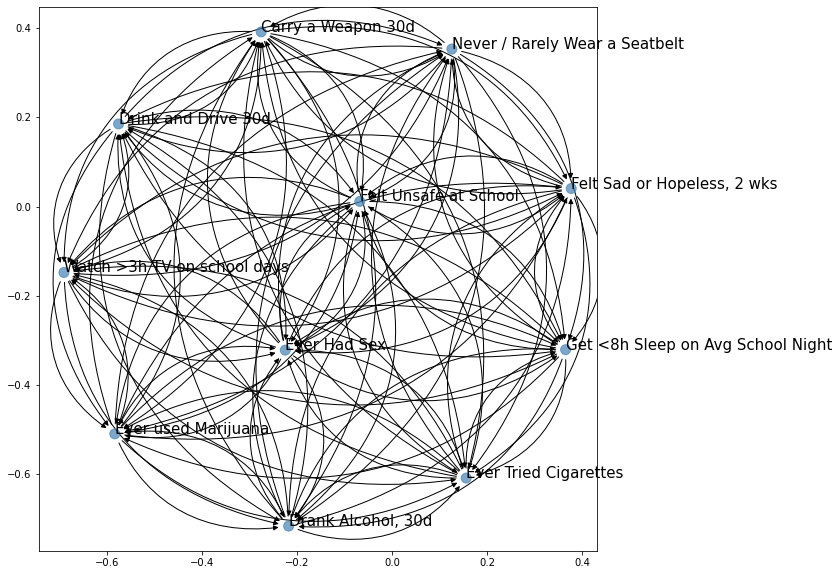

In [116]:
fig, ax = plt.subplots(figsize=(10, 10))
g.vs['label'] = g.vs['name']
if g.vs['name'] == ['Ever Had Sex', 'Felt Sad or Hopeless, 2 wks', 'Ever used Marijuana']: 
    vertex_color = '#b166eb'
ig.plot(g, target=ax, bbox=(400,400), layout=layout, vertex_size=10, alpha=0.7, 
        vertex_label = vertex_names, vertex_label_size=15)


In [118]:
g = nx.from_pandas_edgelist(df, source='source', 
                            target='target', edge_attr='weight')

In [119]:
def cytoscape_data(G, attrs=None, name="name", ident="id"):
    """Returns data in Cytoscape JSON format (cyjs).

    Parameters
    ----------
    G : NetworkX Graph
        The graph to convert to cytoscape format
    attrs : dict or None (default=None)
        A dictionary containing the keys 'name' and 'ident' which are mapped to
        the 'name' and 'id' node elements in cyjs format. All other keys are
        ignored. Default is `None` which results in the default mapping
        ``dict(name="name", ident="id")``.

        .. deprecated:: 2.6

           The `attrs` keyword argument will be replaced with `name` and
           `ident` in networkx 3.0

    name : string
        A string which is mapped to the 'name' node element in cyjs format.
        Must not have the same value as `ident`.
    ident : string
        A string which is mapped to the 'id' node element in cyjs format.
        Must not have the same value as `name`.

    Returns
    -------
    data: dict
        A dictionary with cyjs formatted data.

    Raises
    ------
    NetworkXError
        If the values for `name` and `ident` are identical.

    See Also
    --------
    cytoscape_graph: convert a dictionary in cyjs format to a graph

    References
    ----------
    .. [1] Cytoscape user's manual:
       http://manual.cytoscape.org/en/stable/index.html

    Examples
    --------
    >>> G = nx.path_graph(2)
    >>> nx.cytoscape_data(G)  # doctest: +SKIP
    {'data': [],
     'directed': False,
     'multigraph': False,
     'elements': {'nodes': [{'data': {'id': '0', 'value': 0, 'name': '0'}},
       {'data': {'id': '1', 'value': 1, 'name': '1'}}],
      'edges': [{'data': {'source': 0, 'target': 1}}]}}
    """
    # ------ TODO: Remove between the lines in 3.0 ----- #
    if attrs is not None:
        import warnings

        msg = (
            "\nThe `attrs` keyword argument of cytoscape_data is deprecated\n"
            "and will be removed in networkx 3.0.\n"
            "It is replaced with explicit `name` and `ident` keyword\n"
            "arguments.\n"
            "To make this warning go away and ensure usage is forward\n"
            "compatible, replace `attrs` with `name` and `ident`,\n"
            "for example:\n\n"
            "   >>> cytoscape_data(G, attrs={'name': 'foo', 'ident': 'bar'})\n\n"
            "should instead be written as\n\n"
            "   >>> cytoscape_data(G, name='foo', ident='bar')\n\n"
            "in networkx 3.0.\n"
            "The default values of 'name' and 'id' will not change."
        )
        warnings.warn(msg, DeprecationWarning, stacklevel=2)

        name = attrs["name"]
        ident = attrs["ident"]
    # -------------------------------------------------- #

    if name == ident:
        raise nx.NetworkXError("name and ident must be different.")

    jsondata = {"data": list(G.graph.items())}
    jsondata["directed"] = G.is_directed()
    jsondata["multigraph"] = G.is_multigraph()
    jsondata["elements"] = {"nodes": [], "edges": []}
    nodes = jsondata["elements"]["nodes"]
    edges = jsondata["elements"]["edges"]

    for i, j in G.nodes.items():
        n = {"data": j.copy()}
        n["data"]["id"] = j.get(ident) or str(i)
        n["data"]["value"] = i
        n["data"]["name"] = j.get(name) or str(i)
        nodes.append(n)

    if G.is_multigraph():
        for e in G.edges(keys=True):
            n = {"data": G.adj[e[0]][e[1]][e[2]].copy()}
            n["data"]["source"] = e[0]
            n["data"]["target"] = e[1]
            n["data"]["key"] = e[2]
            edges.append(n)
    else:
        for e in G.edges():
            n = {"data": G.adj[e[0]][e[1]].copy()}
            n["data"]["source"] = e[0]
            n["data"]["target"] = e[1]
            edges.append(n)
    return jsondata

In [ ]:
 = ig.Graph.DataFrame(df, directed=True)

In [120]:
data = cytoscape_data(g)

In [108]:
__all__ = ["cytoscape_data", "cytoscape_graph"]


In [110]:
def cytoscape_graph(data, attrs=None, name="name", ident="id"):
    """
    Create a NetworkX graph from a dictionary in cytoscape JSON format.

    Parameters
    ----------
    data : dict
        A dictionary of data conforming to cytoscape JSON format.
    attrs : dict or None (default=None)
        A dictionary containing the keys 'name' and 'ident' which are mapped to
        the 'name' and 'id' node elements in cyjs format. All other keys are
        ignored. Default is `None` which results in the default mapping
        ``dict(name="name", ident="id")``.

        .. deprecated:: 2.6

           The `attrs` keyword argument will be replaced with `name` and
           `ident` in networkx 3.0

    name : string
        A string which is mapped to the 'name' node element in cyjs format.
        Must not have the same value as `ident`.
    ident : string
        A string which is mapped to the 'id' node element in cyjs format.
        Must not have the same value as `name`.

    Returns
    -------
    graph : a NetworkX graph instance
        The `graph` can be an instance of `Graph`, `DiGraph`, `MultiGraph`, or
        `MultiDiGraph` depending on the input data.

    Raises
    ------
    NetworkXError
        If the `name` and `ident` attributes are identical.

    See Also
    --------
    cytoscape_data: convert a NetworkX graph to a dict in cyjs format

    References
    ----------
    .. [1] Cytoscape user's manual:
       http://manual.cytoscape.org/en/stable/index.html

    Examples
    --------
    >>> data_dict = {
    ...     'data': [],
    ...     'directed': False,
    ...     'multigraph': False,
    ...     'elements': {'nodes': [{'data': {'id': '0', 'value': 0, 'name': '0'}},
    ...       {'data': {'id': '1', 'value': 1, 'name': '1'}}],
    ...      'edges': [{'data': {'source': 0, 'target': 1}}]}
    ... }
    >>> G = nx.cytoscape_graph(data_dict)
    >>> G.name
    ''
    >>> G.nodes()
    NodeView((0, 1))
    >>> G.nodes(data=True)[0]
    {'id': '0', 'value': 0, 'name': '0'}
    >>> G.edges(data=True)
    EdgeDataView([(0, 1, {'source': 0, 'target': 1})])
    """
    # ------ TODO: Remove between the lines in 3.0 ----- #
    if attrs is not None:
        import warnings

        msg = (
            "\nThe `attrs` keyword argument of cytoscape_data is deprecated\n"
            "and will be removed in networkx 3.0.\n"
            "It is replaced with explicit `name` and `ident` keyword\n"
            "arguments.\n"
            "To make this warning go away and ensure usage is forward\n"
            "compatible, replace `attrs` with `name` and `ident`,\n"
            "for example:\n\n"
            "   >>> cytoscape_data(G, attrs={'name': 'foo', 'ident': 'bar'})\n\n"
            "should instead be written as\n\n"
            "   >>> cytoscape_data(G, name='foo', ident='bar')\n\n"
            "The default values of 'name' and 'id' will not change."
        )
        warnings.warn(msg, DeprecationWarning, stacklevel=2)

        name = attrs["name"]
        ident = attrs["ident"]
    # -------------------------------------------------- #

    if name == ident:
        raise nx.NetworkXError("name and ident must be different.")

    multigraph = data.get("multigraph")
    directed = data.get("directed")
    if multigraph:
        graph = nx.MultiGraph()
    else:
        graph = nx.Graph()
    if directed:
        graph = graph.to_directed()
    graph.graph = dict(data.get("data"))
    for d in data["elements"]["nodes"]:
        node_data = d["data"].copy()
        node = d["data"]["value"]

        if d["data"].get(name):
            node_data[name] = d["data"].get(name)
        if d["data"].get(ident):
            node_data[ident] = d["data"].get(ident)

        graph.add_node(node)
        graph.nodes[node].update(node_data)

    for d in data["elements"]["edges"]:
        edge_data = d["data"].copy()
        sour = d["data"]["source"]
        targ = d["data"]["target"]
        if multigraph:
            key = d["data"].get("key", 0)
            graph.add_edge(sour, targ, key=key)
            graph.edges[sour, targ, key].update(edge_data)
        else:
            graph.add_edge(sour, targ)
            graph.edges[sour, targ].update(edge_data)
    return graph


In [150]:
864 / 10021 * 100

8.62189402255264